# **Simulation Open Loop**


In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from package_DBR import FOPDT, SOPDT, SelectPath_RT

### Load Data From Experiment

In [59]:
nameFile = 'Cleaned_data_Open_loop_experiment_on_MV_2024-03-18-09h24.txt'
nameFile = 'Cleaned_data_Open_loop_experiment_on_MV_2024-03-18-16h11.txt'

titleName = nameFile.split('.')[0]    
data = pd.read_csv('Data/' + nameFile)

if 'MV' in nameFile:
    ExpVariable = 'MV'
    tm = data['tm'].values
    MVm = data['MVm'].values
    PVm = data['PVm'].values    
else:    
    ExpVariable = 'DV'
    tm = data['tm'].values
    DVm = data['DVm'].values 
    PVm = data['PVm'].values
     
print(ExpVariable)    

MV


### **Optimal Parameters** 

In [60]:
Kp_O = 0.40132386439006607
T1_O = 196.8652650283946
T2_O = 7.2992473825984305
theta_O = 4.2713166664221776

Kp_O = 0.3135026933058151
T_O = 206.26385028706403
theta_O = 12.99999828747534

Ts = 1

#Process values
#PV_O = SOPDT(MVm, Kp_O, T1_O, T2_O, theta_O, Ts)
PV_O = FOPDT(MVm, Kp_O, T_O, theta_O, Ts)

### **Graphic's Parameters**

In [61]:
t1 = 67
t2 = 106
Tu = 13.4
Tg = 204.6
a = 0.12
Kp = 0.38

### Broida 1

In [62]:
T_B1 = Tg 
theta_B1 = Tu

print(f'Broida 1 : T = {T_B1}, theta = {theta_B1}')

#Process values
PV_B1 = FOPDT(MVm, Kp, T_B1, theta_B1, Ts) 

Broida 1 : T = 204.6, theta = 13.4


### Broida 2

In [63]:
T_B2 = 5.5*(t2-t1)
theta_B2 = 2.8*t1 - 1.8*t2

print(f'Broida 2 : T = {T_B2}, theta = {theta_B2}')

#Process values
#PV_B2 = FOPDT(MVm, Kp, T_B2, theta_B2, Ts)

Broida 2 : T = 214.5, theta = -3.200000000000017


### van der Grinten

In [64]:
T1_G = Tg * (3 * a * np.exp(1) - 1)/(1 + a * np.exp(1))
T2_G = Tg*(1-a*np.exp(1))/(1+a*np.exp(1))
theta_G = Tu - (T1_G*T2_G)/(T1_G + 3*T2_G)

print(f'van der Grinten : T1 = {T1_G}, T2 = {T2_G}, theta = {theta_G}')

#Process values
PV_G = SOPDT(MVm, Kp, T1_G, T2_G, theta_G, Ts) 

van der Grinten : T1 = -3.3043689232041142, T2 = 103.95218446160206, theta = 14.513252101693826


### Strejc

In [65]:
ratio = Tu/Tg

#Computation of Strejc model parameters
table_a = {1 : 0, 2 : 0.1, 3 : 0.22, 4 : 0.32, 5 : 0.41, 6 : 0.49, 7 : 0.57}
table_b = {1 : 1, 2 : 2.72, 3 : 3.69, 4 : 4.46, 5 : 5.12, 6 : 5.7, 7 : 6.23} 

#Order
n = 0

for key, value in table_a.items() : 
    if value <= ratio and ratio < table_a[key+1] :
        n = key

a_n = table_a[n]
b_n = table_b[n]

T_S = Tg/b_n
Tuth= a_n*Tg
theta_S = Tu - Tuth

print(f'Stretjc : order = {n}, T = {T_S}, theta = {theta_S}')

#Process values
PV_S = FOPDT(MVm, Kp, T_S, theta_S, Ts) 

Stretjc : order = 1, T = 204.6, theta = 13.4


## **Step Responses**

### Graph

(0.0, 990.0)

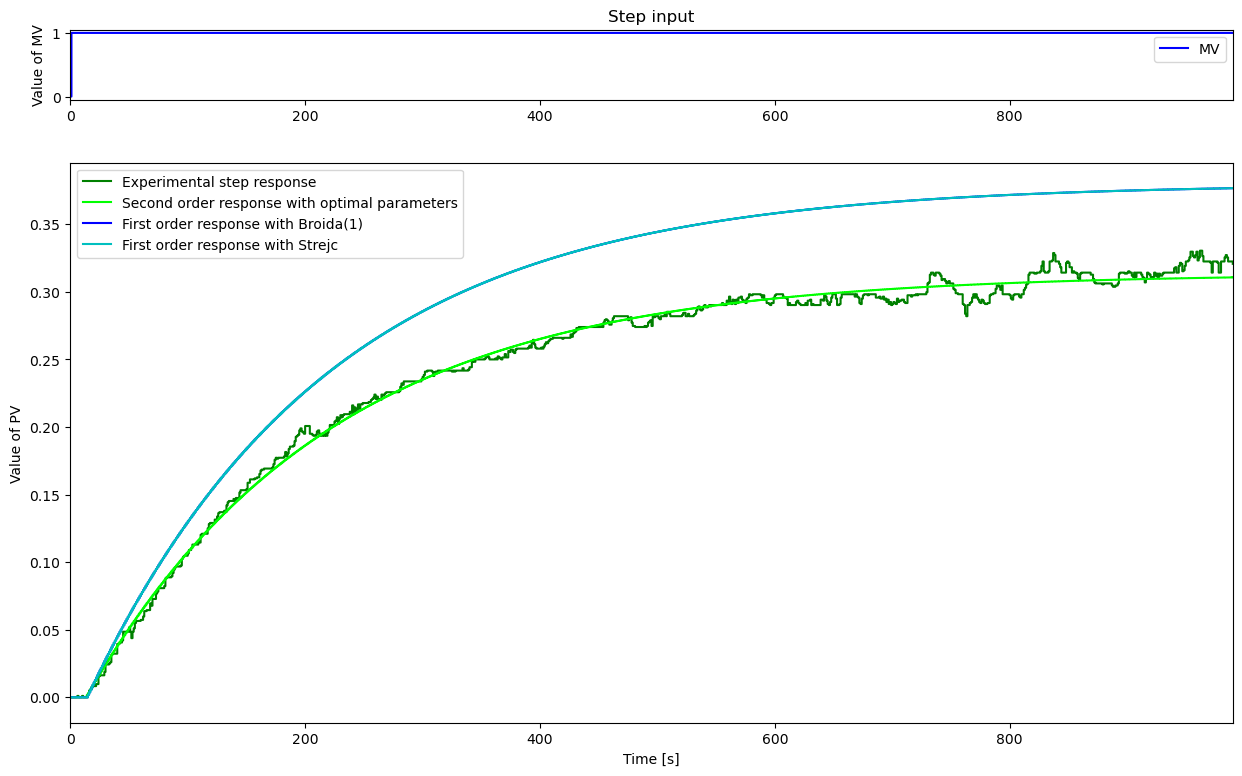

In [66]:
fig, axs = plt.subplots(2, 1, figsize=(15, 9), gridspec_kw={'height_ratios': [1, 8]})

axs[0].step(tm, MVm, 'b-', label='MV', where='post')
axs[0].set_ylabel('Value of MV')
axs[0].set_title('Step input')
axs[0].legend(loc='best')
axs[0].set_xlim([0, np.max(tm)])

axs[1].step(tm, PVm, 'g-', label='Experimental step response', where='post')
axs[1].step(tm, PV_O, 'lime', label='First order response with optimal parameters', where='post')
axs[1].step(tm, PV_B1, 'b-', label='First order response with Broida(1)', where='post')
#axs[1].step(tm, PV_B2, 'k-', label='First order response with Broida(2)', where='post')
#axs[1].step(tm, PV_G, 'r-', label='First order response with van der Grinten', where='post')
axs[1].step(tm, PV_S, 'c-', label='First order response with Strejc', where='post')
axs[1].set_ylabel('Value of PV')
axs[1].set_xlabel('Time [s]')
axs[1].legend(loc='best')
axs[1].set_xlim([0, np.max(tm)])
